In [1]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]]
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) 
dataV2_cohortV3

/tmp/ipykernel_52/3077980230.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

/tmp/ipykernel_52/2102683529.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


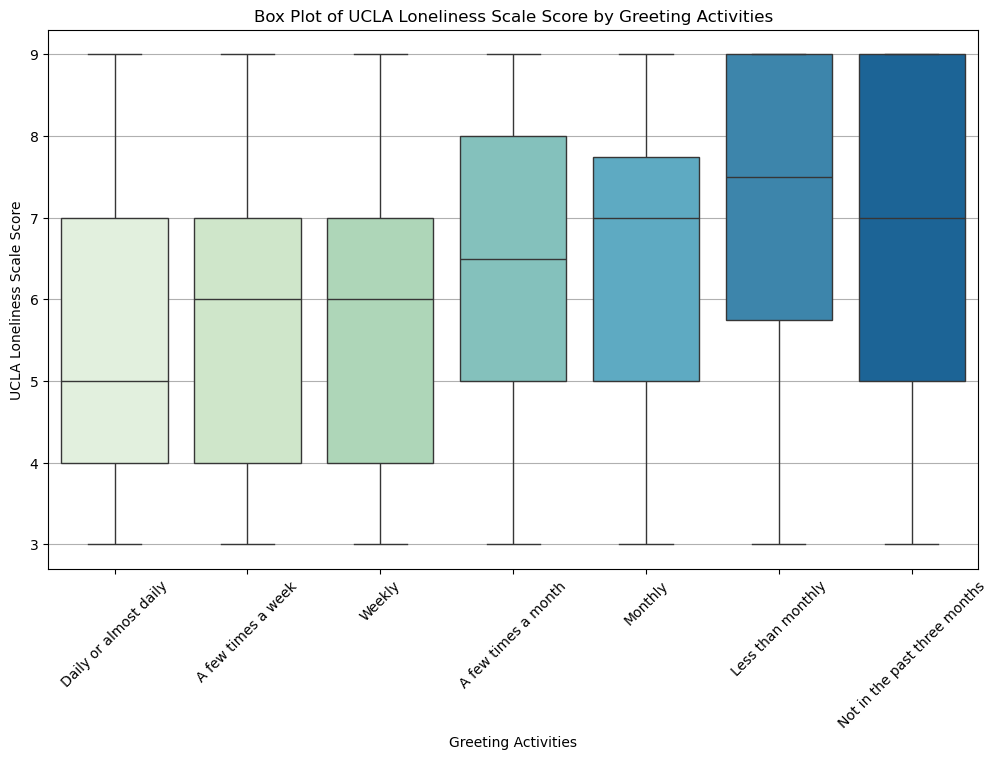

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing loneliness scores
dataV2_cohortV3.dropna(subset=['LONELY_ucla_loneliness_scale_score'], inplace=True)

# Define the order for greeting categories
greeting_order = [
    "Daily or almost daily",
    "A few times a week",
    "Weekly",
    "A few times a month",
    "Monthly",
    "Less than monthly",
    "Not in the past three months"
]

# Convert to categorical type with specified order
dataV2_cohortV3['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'] = pd.Categorical(
    dataV2_cohortV3['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'],
    categories=greeting_order,
    ordered=True
)

# Generate a gradient color palette from green to blue
cmap = sns.color_palette("GnBu", len(greeting_order))  # "GnBu" is a green-to-blue gradient palette

# Set the plot size
plt.figure(figsize=(12, 7))

# Create the box plot with the green-to-blue gradient color palette
sns.boxplot(
    x='CONNECTION_activities_greeted_neighbour_or_stranger_p3m',
    y='LONELY_ucla_loneliness_scale_score',
    data=dataV2_cohortV3,
    palette=cmap  # Apply the green-to-blue gradient color palette
)

# Set plot labels and title
plt.xlabel('Greeting Activities')
plt.ylabel('UCLA Loneliness Scale Score')
plt.title('Box Plot of UCLA Loneliness Scale Score by Greeting Activities')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

/tmp/ipykernel_52/4036526939.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data_plot.groupby(['CONNECTION_activities_greeted_neighbour_or_stranger_p3m', 'LONELY_ucla_loneliness_scale_score']).size().unstack(fill_value=0)


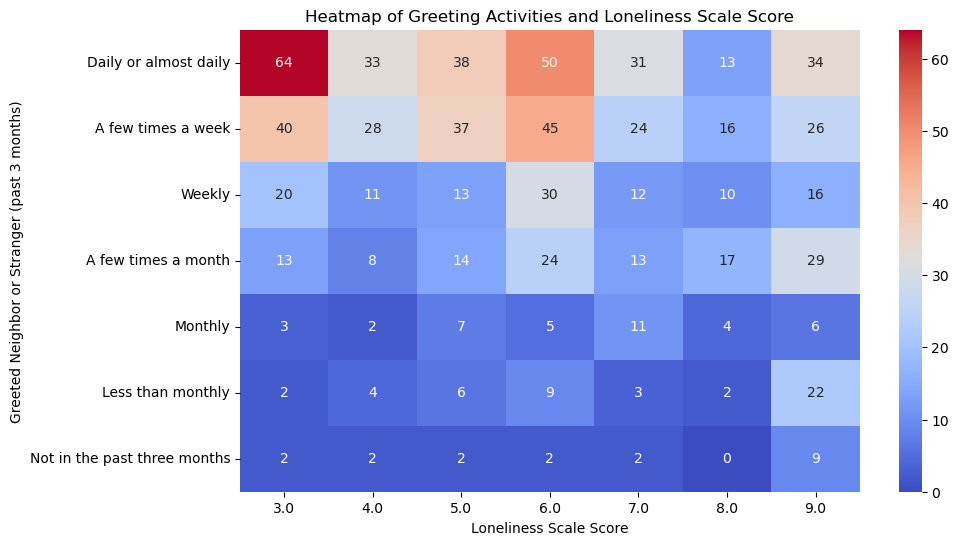

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the desired order for the greeting frequency
greeting_order = [
    "Daily or almost daily",
    "A few times a week",
    "Weekly",
    "A few times a month",
    "Monthly",
    "Less than monthly",
    "Not in the past three months"
]

# Drop rows with NaN values in the specified columns
data_plot = dataV2_cohortV3[['CONNECTION_activities_greeted_neighbour_or_stranger_p3m', 'LONELY_ucla_loneliness_scale_score']].dropna()

# Convert the greeting column to a categorical type with the specified order
data_plot['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'] = pd.Categorical(
    data_plot['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'],
    categories=greeting_order,
    ordered=True
)

# Get counts for each combination of the two categorical variables
count_data = data_plot.groupby(['CONNECTION_activities_greeted_neighbour_or_stranger_p3m', 'LONELY_ucla_loneliness_scale_score']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)

# Adding title and labels
plt.title("Heatmap of Greeting Activities and Loneliness Scale Score")
plt.xlabel("Loneliness Scale Score")
plt.ylabel("Greeted Neighbor or Stranger (past 3 months)")

plt.show()

In [6]:
import pandas as pd
import numpy as np

# Define the greeted and not greeted groups based on specified criteria
greeted_responses = [
    'Daily or almost daily', 
    'A few times a week', 
    'Weekly', 
    'A few times a month'
]
dataV2_cohortV3['Greeting_Group'] = np.where(
    dataV2_cohortV3['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'].isin(greeted_responses), 
    'Greeted', 
    'Not Greeted'
)

# Separate the groups
group_greeted = dataV2_cohortV3[dataV2_cohortV3['Greeting_Group'] == 'Greeted']['LONELY_ucla_loneliness_scale_score'].dropna()
group_not_greeted = dataV2_cohortV3[dataV2_cohortV3['Greeting_Group'] == 'Not Greeted']['LONELY_ucla_loneliness_scale_score'].dropna()

# Calculate the observed test statistic (mean difference)
observed_diff = group_greeted.mean() - group_not_greeted.mean()

# Combine both groups for permutation testing
combined = np.concatenate([group_greeted, group_not_greeted])
n_greeted = len(group_greeted)
n_not_greeted = len(group_not_greeted)

# Perform permutation test and store differences
n_permutations = 10000
perm_differences = []

for _ in range(n_permutations):
    np.random.shuffle(combined)  # Shuffle the combined data
    new_group_greeted = combined[:n_greeted]
    new_group_not_greeted = combined[n_greeted:]
    new_diff = new_group_greeted.mean() - new_group_not_greeted.mean()
    perm_differences.append(new_diff)

# Calculate the p-value
count_extreme = np.sum(np.abs(perm_differences) >= abs(observed_diff))
p_value = count_extreme / n_permutations

# Calculate 95% confidence interval
lower_bound = np.percentile(perm_differences, 2.5)
upper_bound = np.percentile(perm_differences, 97.5)

# Output results
print(f"Observed mean difference: {observed_diff:.4f}")
print(f"P-value from permutation test: {p_value:.4f}")
print(f"95% Confidence interval for mean difference: ({lower_bound:.4f}, {upper_bound:.4f})")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between greeting activities and loneliness scores.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Observed mean difference: -1.0549
P-value from permutation test: 0.0000
95% Confidence interval for mean difference: (-0.4151, 0.4091)
Reject the null hypothesis: There is a significant association between greeting activities and loneliness scores.


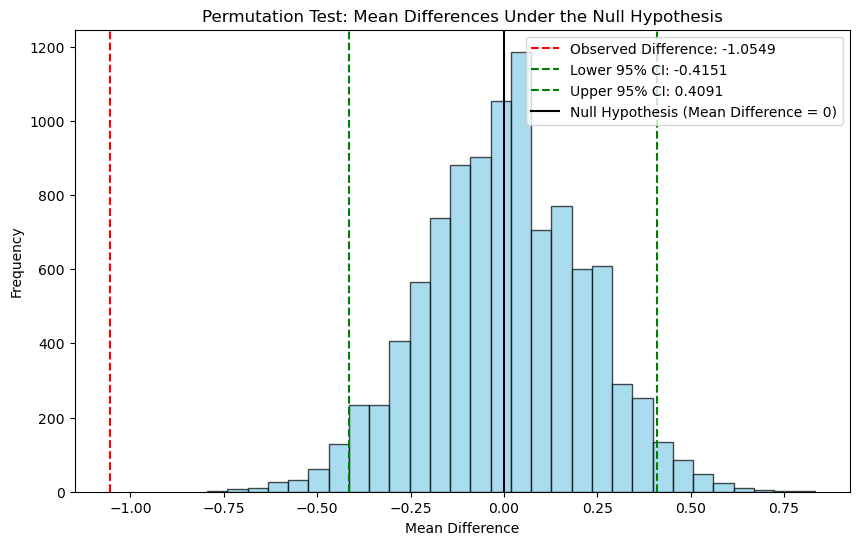

In [7]:
import matplotlib.pyplot as plt

# Plot the permutation test results
plt.figure(figsize=(10, 6))
plt.hist(perm_differences, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Difference: {observed_diff:.4f}')
plt.axvline(lower_bound, color='green', linestyle='--', label=f'Lower 95% CI: {lower_bound:.4f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper 95% CI: {upper_bound:.4f}')
plt.axvline(0, color='black', linestyle='-', label='Null Hypothesis (Mean Difference = 0)')

# Add labels and title
plt.title('Permutation Test: Mean Differences Under the Null Hypothesis')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

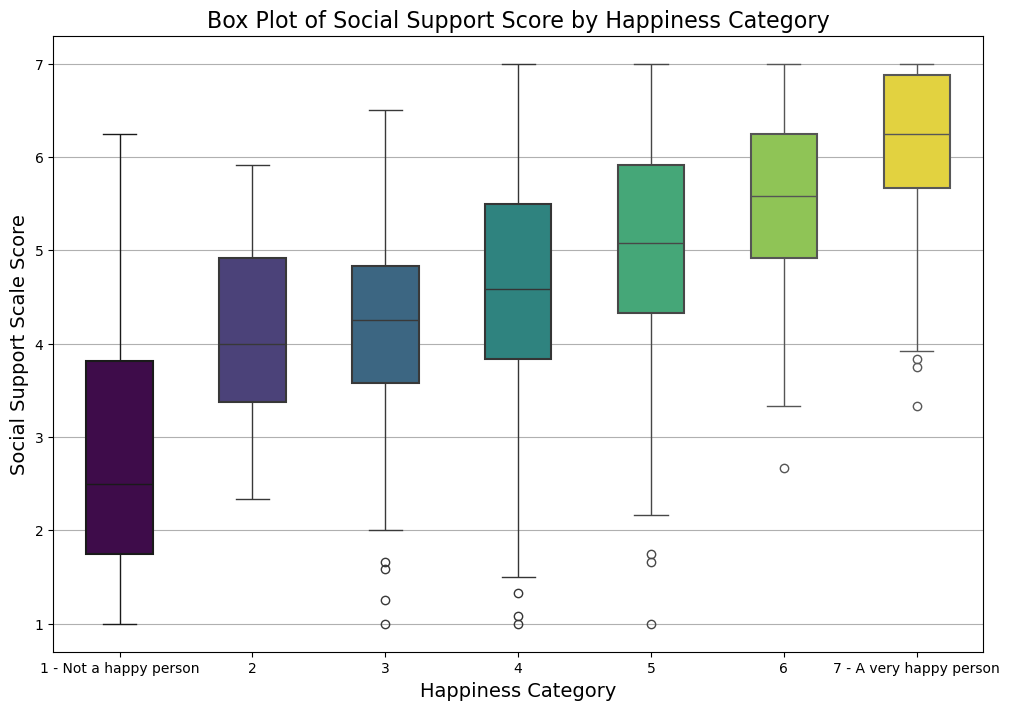

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop rows with NaN in the relevant columns
dataV2_cohortV3 = dataV2_cohortV3.dropna(subset=['PSYCH_zimet_multidimensional_social_support_scale_score', 
                                                   'WELLNESS_subjective_happiness_scale_happy'])

# Ensure happiness scale is treated as categorical
dataV2_cohortV3['Happiness_Category'] = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].astype('category')

# Set the plot size
plt.figure(figsize=(12, 8))

# Get a colormap (for example, 'viridis' or any other of your choice)
cmap = plt.get_cmap('viridis', len(dataV2_cohortV3['Happiness_Category'].cat.categories))

# Create a box plot with a gradient effect
# Use the category labels to loop through and assign colors
for i, category in enumerate(dataV2_cohortV3['Happiness_Category'].cat.categories):
    # Create a boxplot for each category with a specific color from the colormap
    sns.boxplot(
        x='Happiness_Category', 
        y='PSYCH_zimet_multidimensional_social_support_scale_score', 
        data=dataV2_cohortV3[dataV2_cohortV3['Happiness_Category'] == category],
        color=cmap(i),  # Use color from the colormap
        width=0.5,  # Control the width of the boxes
        boxprops=dict(linewidth=1.5)
    )

# Set the positions of x-ticks to the category labels
plt.xticks(ticks=np.arange(len(dataV2_cohortV3['Happiness_Category'].cat.categories)), 
           labels=dataV2_cohortV3['Happiness_Category'].cat.categories)

# Set plot titles and labels
plt.title('Box Plot of Social Support Score by Happiness Category', fontsize=16)
plt.xlabel('Happiness Category', fontsize=14)
plt.ylabel('Social Support Scale Score', fontsize=14)
plt.grid(axis='y')

# Show the plot
plt.show()

  Using cached joypy-0.2.6-py2.py3-none-any.whl.metadata (812 bytes)
Using cached joypy-0.2.6-py2.py3-none-any.whl (8.6 kB)


/tmp/ipykernel_52/2791294050.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm', len(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].cat.categories))
/opt/conda/lib/python3.11/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1000x800 with 0 Axes>

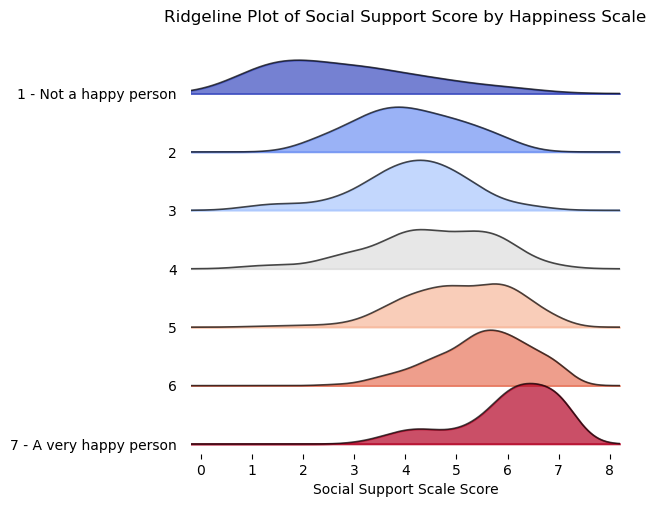

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install joypy
from joypy import joyplot
from matplotlib import cm

# Load and preprocess your data (assuming dataV2_cohortV3 is your DataFrame)
dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'] = pd.Categorical(
    dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'], 
    ordered=True
)

# Create the ridgeline plot
plt.figure(figsize=(10, 8))

# Use the 'coolwarm' colormap from Matplotlib
colormap = cm.get_cmap('coolwarm', len(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].cat.categories))

# Create the ridgeline plot with adjusted overlap
joyplot(
    data=dataV2_cohortV3, 
    by='WELLNESS_subjective_happiness_scale_happy', 
    column='PSYCH_zimet_multidimensional_social_support_scale_score', 
    fill=True, 
    colormap=colormap, 
    linewidth=1.2, 
    alpha=0.7,
    overlap=0.25  # Decrease overlap to increase distance between ridgelines
)

# Add labels and title
plt.xlabel("Social Support Scale Score")
plt.title("Ridgeline Plot of Social Support Score by Happiness Scale")
plt.show()